In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import quad
%matplotlib inline
from importlib import reload
import Thermodynamics
reload(Thermodynamics)
from Thermodynamics import *

from cpclasses.PlotTools import *

Accepted 7549 out of 9999 samples: 75.5% acceptance rate
Accepted 9336 out of 9999 samples: 93.4% acceptance rate
Accepted 9771 out of 9999 samples: 97.7% acceptance rate
Accepted 9796 out of 9999 samples: 98% acceptance rate


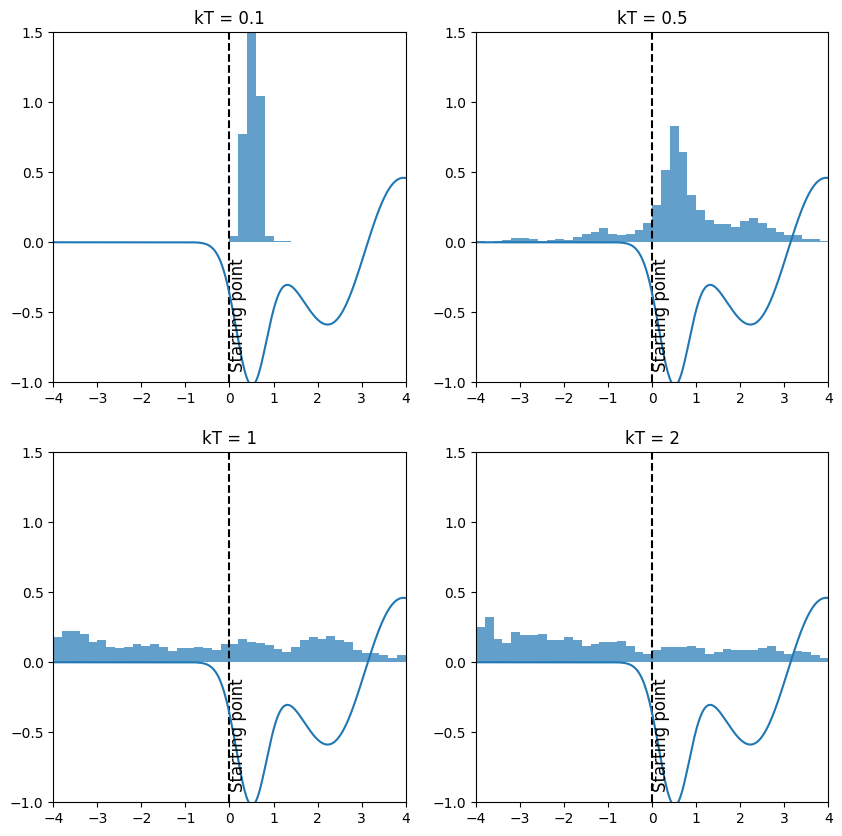

In [16]:
a,b = [0.5,0.5]

#Make this potential equal to 100 below -4 and above 4 and make it work for arrays:
def custom_potential(x):
    potential = np.sin(x) * (- np.exp(-a*(x-3)**2)) - np.exp(-((x-0.5)/b)**2)
    potential = np.where(x < -4, 100, potential)
    potential = np.where(x > 4, 100, potential)
    return potential

CustomPotential_RW = Potential(V = custom_potential, kT = 0.5, x_range = [-4, 4], N_bins = 40, type = 'Custom', delta_x = 0.1)

N = 1e4
kTs= [0.1, 0.5, 1, 2]
fig, axs = plt.subplots(2,2, figsize=(10,10))


initial_point = 0
for kT, ax in zip(kTs, axs.flatten()):
    CustomPotential_RW.kT = kT
    
    ax.axvline(x=initial_point, color='black', linestyle='--', label='Starting point')
    ax.text(x=initial_point, y=-0.9, s='Starting point', fontsize=12, color='black', rotation=90)
    ax.set(xlim=(-4, 4), ylim=(-1, 1.5))
    
    CustomPotential_RW.plot_mcmc(ax, N = int(N), initial_point=initial_point)
    CustomPotential_RW.plot_V(ax)
    ax.set_title(f'kT = {kT}')


save_plot(fig,'CustomPotential_RW, Varying Temperatures.png')

Accepted 6201 out of 9999 samples: 62% acceptance rate
Accepted 6136 out of 9999 samples: 61.4% acceptance rate
Accepted 6122 out of 9999 samples: 61.2% acceptance rate
Accepted 6185 out of 9999 samples: 61.9% acceptance rate


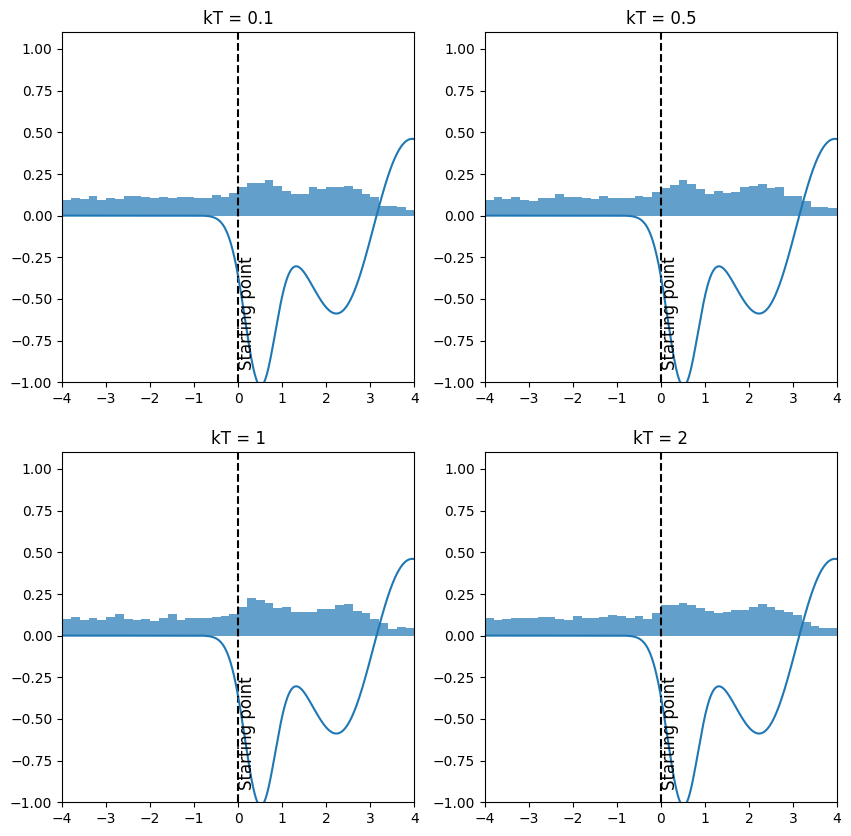

In [17]:
CustomPotential_Uniform = Potential(V= custom_potential, kT = 0.5, x_range = [-4, 4], N_bins = 40, type = 'Custom', method = 'Uniform')
5
Ns_for_MCMC = np.logspace(2,5 , 4)
fig, axs = plt.subplots(2,2, figsize=(10,10))

N = 1e4
kTs= [0.1, 0.5, 1, 2]

for kT, ax in zip(kTs, axs.flatten()):
    CustomPotential_RW.kT = kT
    
    ax.axvline(x=initial_point, color='black', linestyle='--', label='Starting point')
    ax.text(x=initial_point, y=-0.9, s='Starting point', fontsize=12, color='black', rotation=90)
    ax.set(xlim=(-4, 4), ylim=(-1, 1.1))
    CustomPotential_Uniform.plot_mcmc(ax, N = int(N), initial_point=initial_point)
    CustomPotential_Uniform.plot_V(ax)
    ax.set_title(f'kT = {kT}')
save_plot(fig, 'CustomPotential_Uniform, Varying Temperatures.png')